In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/incident_profile_95.csv')
df.columns.sort_values()

Index(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH', 'CRASH_YEAR',
       'adverse_weather_crash_rate', 'avg_age', 'avg_crash_severity_score',
       'avg_lighting_severity', 'avg_responsibility_score',
       'avg_roadway_severity', 'avg_weather_severity',
       'combined_weather_road_severity', 'damage_cost_LB', 'damage_high',
       'damage_low', 'damage_medium', 'fatality_rate', 'injury_severity_score',
       'male_ratio', 'neo_patented_drivers', 'night_crash_rate',
       'num_towed_units_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'road_defect_crash_rate', 'senior_drivers', 'severe_injury_rate',
       'speeding_influence', 'sum_category_motorcycle',
       'sum_category_off-road/specialized', 'sum_category_passenger vehicle',
       'sum_category_public transport', 'sum_category_truck/commercial',
       'sum_damage_category_high', 'sum_damage_category_low',
       'sum_damage_category_medium', 'sum_lighting_category_daylight',
       'sum_lighting_category_night', 's

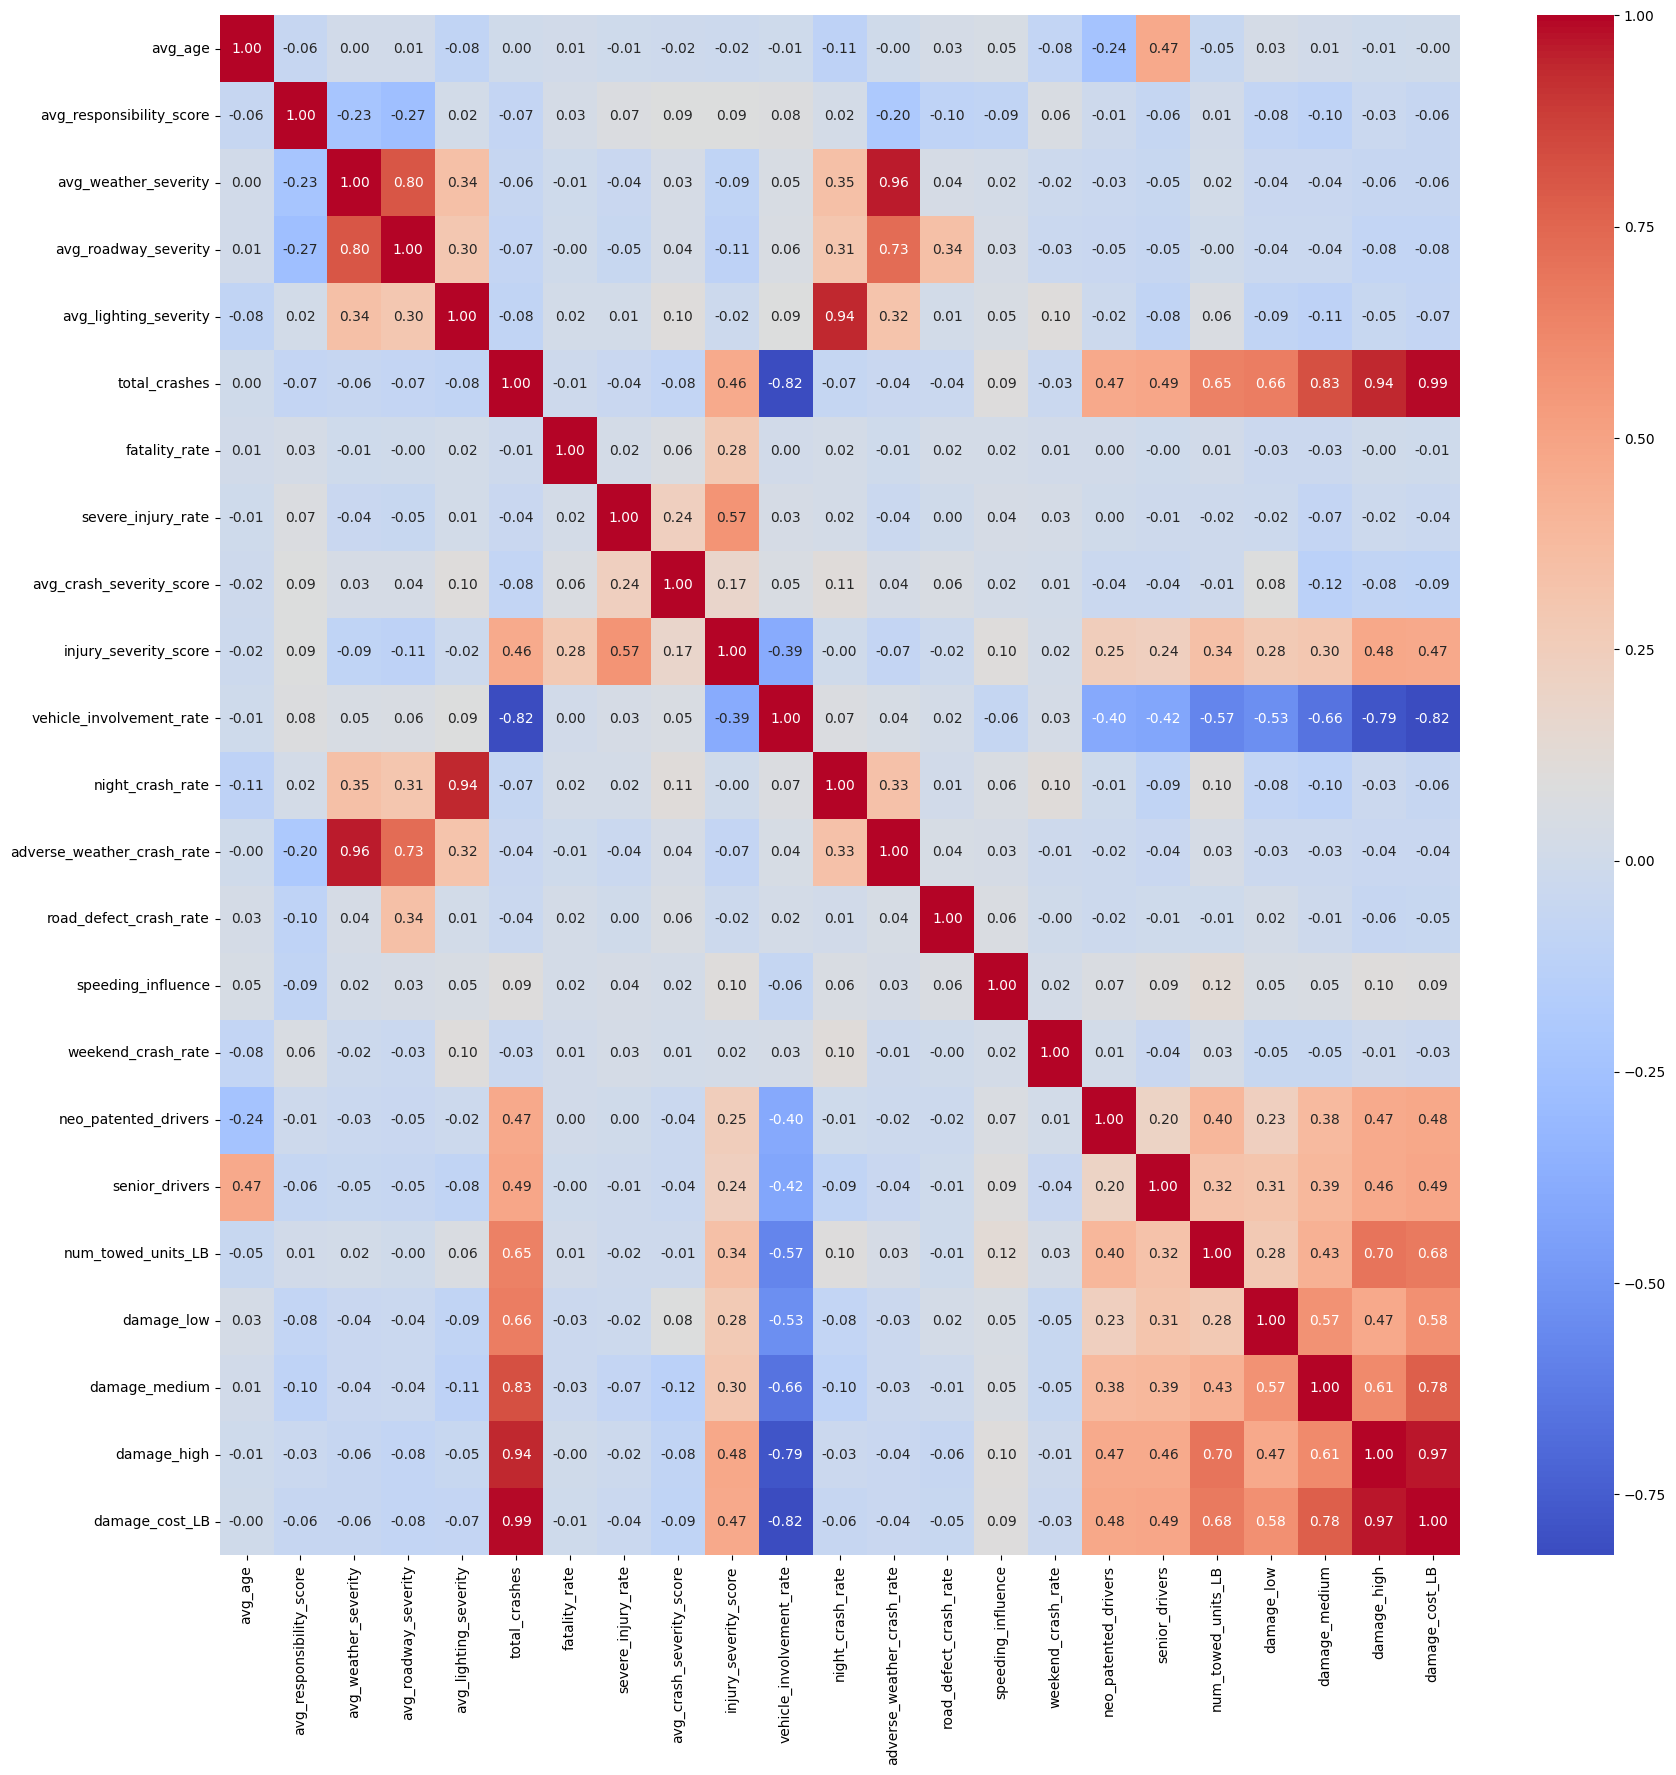

In [5]:
columns = ['avg_age', 'avg_responsibility_score', 'avg_weather_severity',
           'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes', 'fatality_rate',
           'severe_injury_rate', 'avg_crash_severity_score', 'injury_severity_score', 'vehicle_involvement_rate',
           'night_crash_rate', 'adverse_weather_crash_rate', 'road_defect_crash_rate', 'speeding_influence',
           'weekend_crash_rate', 'neo_patented_drivers', 'senior_drivers', 'num_towed_units_LB', 'damage_low','damage_medium', 
           'damage_high', 'damage_cost_LB']

plt.figure(figsize=(20, 20))
sns.heatmap(df[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Features for clustering

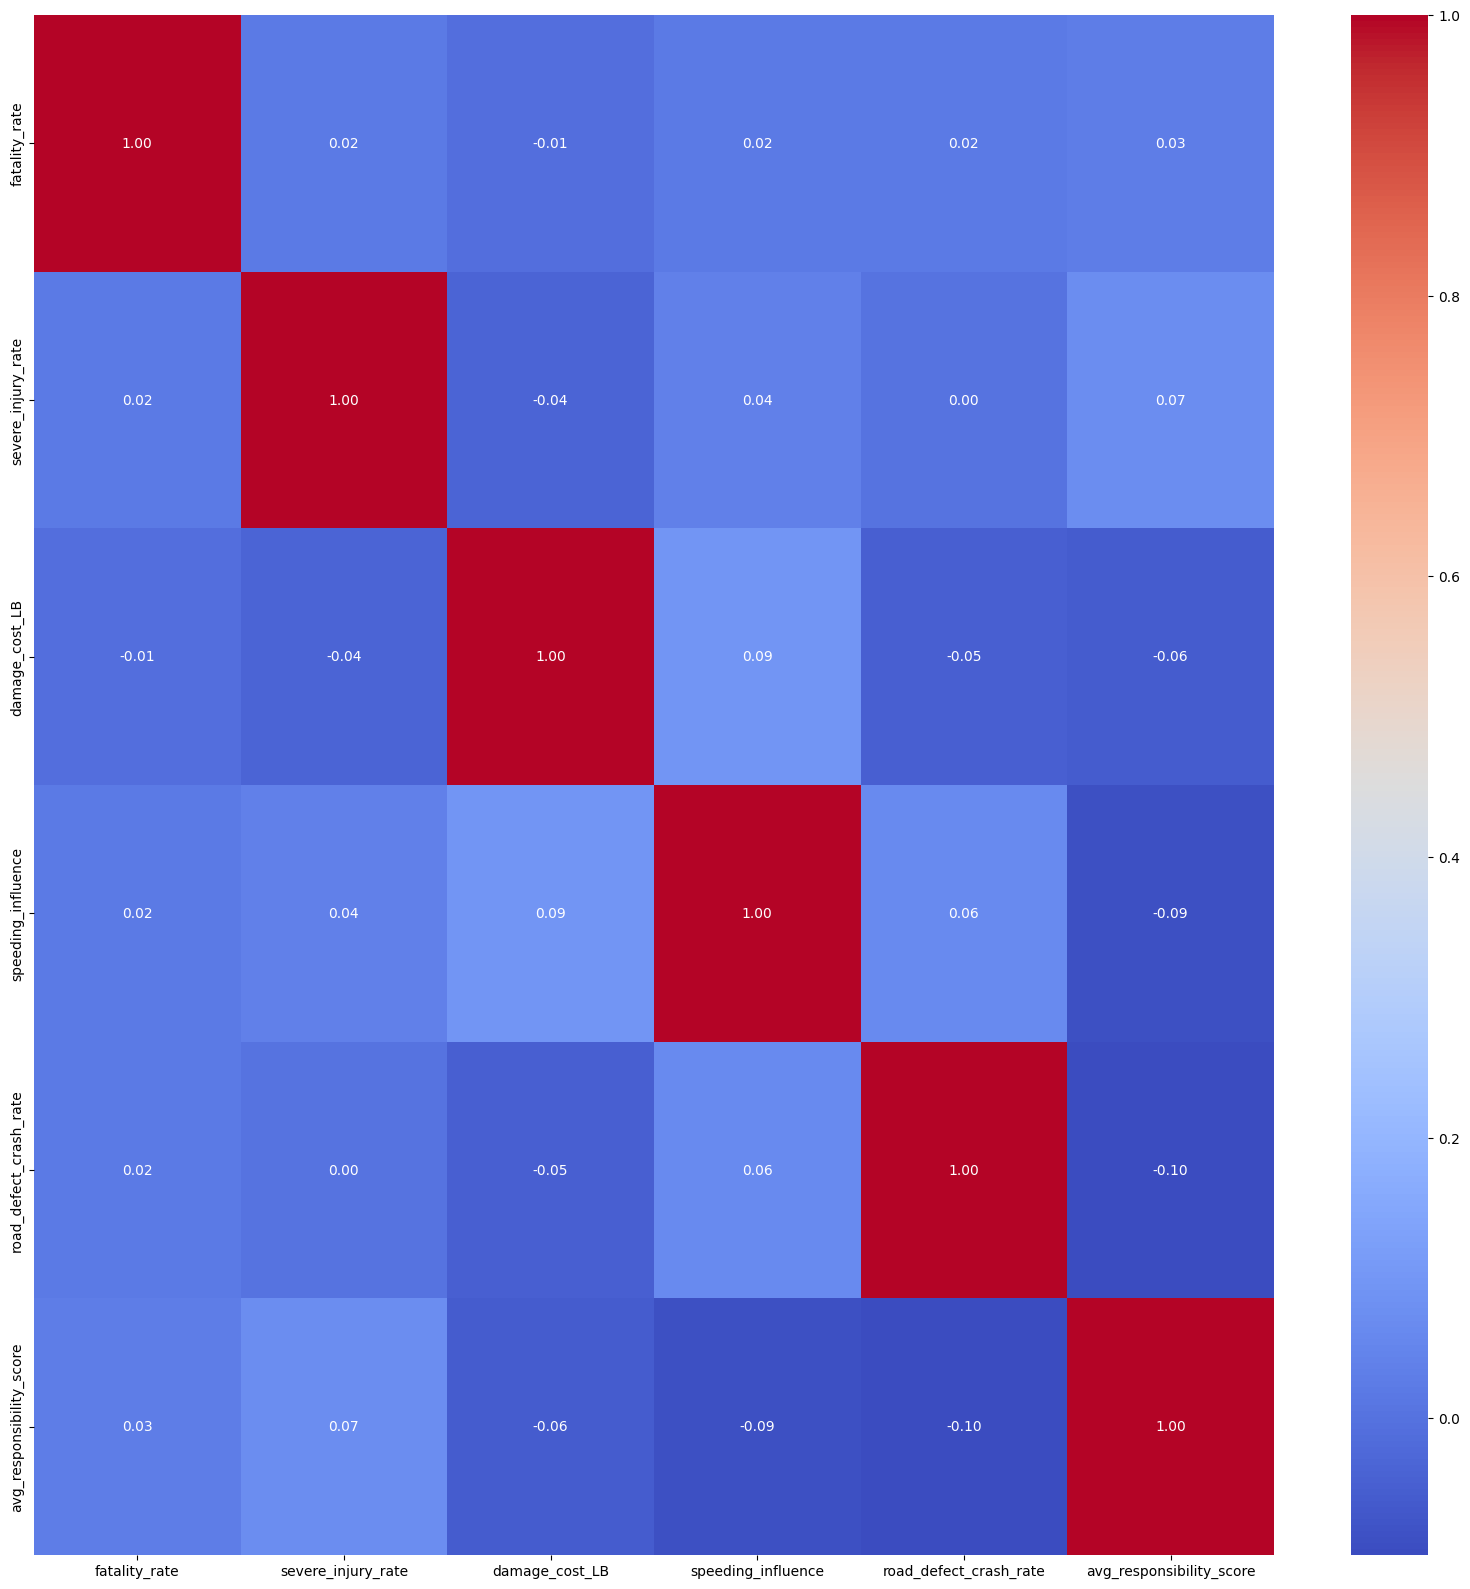

In [6]:
selected_features = ['avg_age', 'avg_weather_severity', 'fatality_rate', 'severe_injury_rate', 
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate']

selected_features = ['fatality_rate', 'severe_injury_rate', 'damage_cost_LB', 'speeding_influence', 'road_defect_crash_rate', 'avg_responsibility_score']

plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Some of them can be exchanged. Es. Damage_cost_LB with vehicle_involement_rate

In [7]:
#Possible features to use for validation 
validation_features = list(set(columns) - set(selected_features))
validation_features

['vehicle_involvement_rate',
 'injury_severity_score',
 'damage_high',
 'senior_drivers',
 'night_crash_rate',
 'total_crashes',
 'avg_crash_severity_score',
 'num_towed_units_LB',
 'damage_medium',
 'weekend_crash_rate',
 'adverse_weather_crash_rate',
 'neo_patented_drivers',
 'damage_low',
 'avg_age',
 'avg_weather_severity',
 'avg_roadway_severity',
 'avg_lighting_severity']

## Standard Scaler

In [8]:
scaler_ss = StandardScaler()
df_cluster_ss = scaler_ss.fit_transform(df[selected_features])
df_cluster_ss = pd.DataFrame(df_cluster_ss, columns=df[selected_features].columns)
df_cluster_ss.head()

,fatality_rate,severe_injury_rate,damage_cost_LB,speeding_influence,road_defect_crash_rate,avg_responsibility_score
0,-0.167177,-0.649944,-0.800017,-0.380612,-0.600599,-0.514334
1,-0.167177,-0.649944,-1.021830,-1.011187,-0.600599,-0.325562
2,-0.167177,-0.649944,-0.777836,-0.380612,-0.600599,0.010793
3,-0.167177,0.290063,0.663944,1.606295,0.584639,-1.074355
4,-0.167177,-0.649944,0.153776,0.039772,0.271868,-1.206494


### Visualize the data with a 2D PCA

C:\Users\giuli\AppData\Local\Temp\ipykernel_9944\2539881587.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')


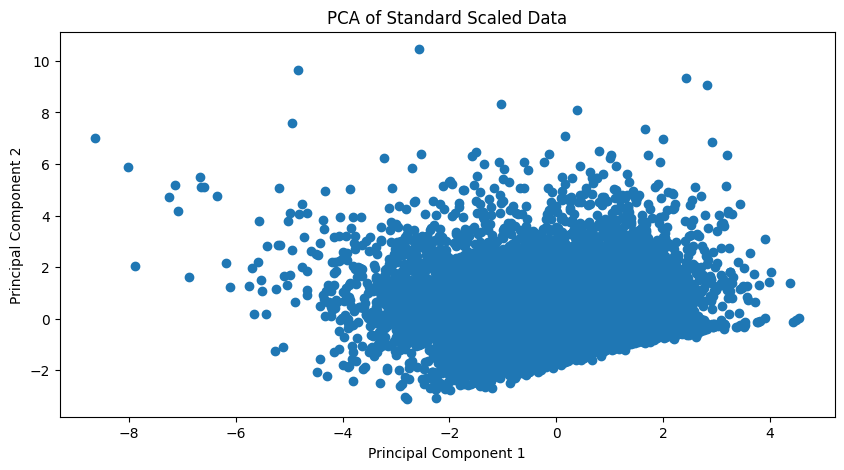

In [9]:
pca = PCA(n_components=2)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')
plt.title('PCA of Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 3D PCA

C:\Users\giuli\AppData\Local\Temp\ipykernel_9944\3313555010.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')


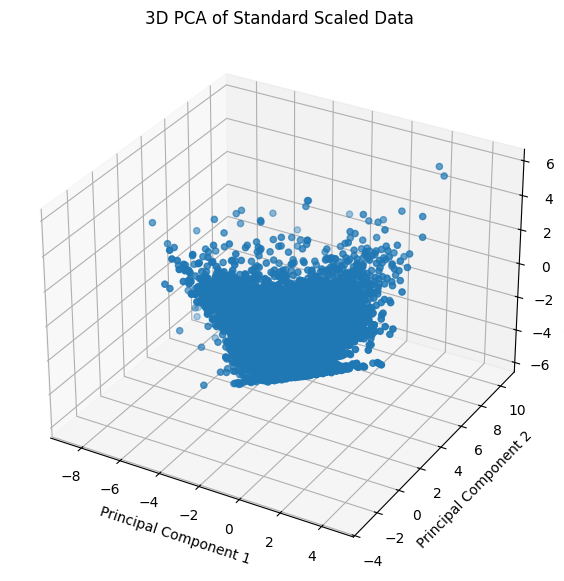

In [10]:
pca = PCA(n_components=3)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')
ax.set_title('3D PCA of Standard Scaled Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## MinMaxScaler

In [11]:
scaler_mm = MinMaxScaler()
df_cluster_mm = scaler_mm.fit_transform(df[selected_features])
df_cluster_mm = pd.DataFrame(df_cluster_mm, columns=df[selected_features].columns)
df_cluster_mm.head()

,fatality_rate,severe_injury_rate,damage_cost_LB,speeding_influence,road_defect_crash_rate,avg_responsibility_score
0,0.0,0.000000,0.084833,0.050000,0.000000,0.526786
1,0.0,0.000000,0.059126,0.000000,0.000000,0.541667
2,0.0,0.000000,0.087404,0.050000,0.000000,0.568182
3,0.0,0.085535,0.254499,0.207547,0.098113,0.482639
4,0.0,0.000000,0.195373,0.083333,0.072222,0.472222


C:\Users\giuli\AppData\Local\Temp\ipykernel_9944\1883562660.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], cmap='viridis')


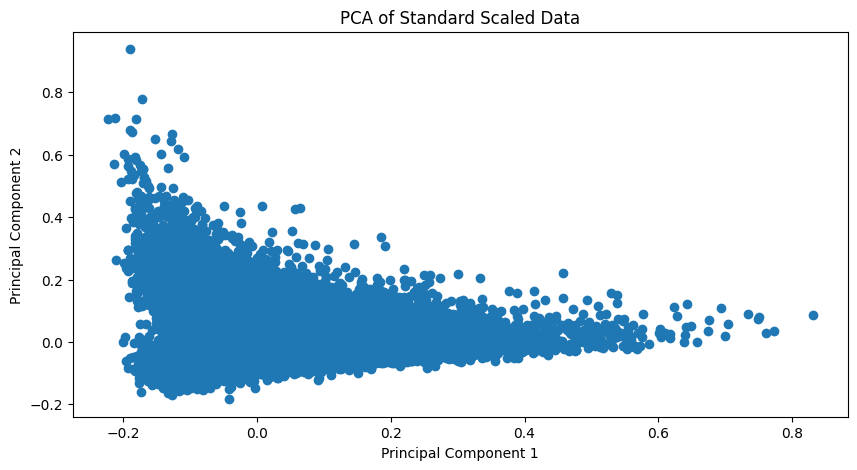

In [12]:
pca = PCA(n_components=2)
df_cluster_pca_mm = pca.fit_transform(df_cluster_mm)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], cmap='viridis')
plt.title('PCA of Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\giuli\AppData\Local\Temp\ipykernel_9944\3296546043.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], df_cluster_pca_mm[:, 2], cmap='viridis')


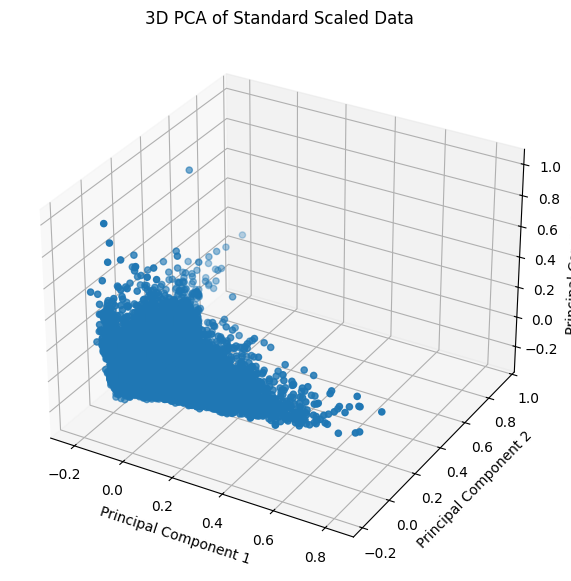

In [13]:
pca = PCA(n_components=3)
df_cluster_pca_mm = pca.fit_transform(df_cluster_mm)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], df_cluster_pca_mm[:, 2], cmap='viridis')
ax.set_title('3D PCA of Standard Scaled Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# K-Means

### Best random_state

In [14]:
rang = range(2, 18)

In [15]:
""" sse = []
for random_state in range(1, 201):
    best_sse = float('inf')
    for k in rang:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df_cluster_ss)
        if kmeans.inertia_ < best_sse:
            best_sse = kmeans.inertia_
    sse.append(best_sse)

best_random_state = sse.index(min(sse)) + 1
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), sse, marker='o')
plt.title('Best SSE for each Random State')
plt.xlabel('Random State')
plt.ylabel('SSE')
plt.show() """

" sse = []\nfor random_state in range(1, 201):\n    best_sse = float('inf')\n    for k in rang:\n        kmeans = KMeans(n_clusters=k, random_state=random_state)\n        kmeans.fit(df_cluster_ss)\n        if kmeans.inertia_ < best_sse:\n            best_sse = kmeans.inertia_\n    sse.append(best_sse)\n\nbest_random_state = sse.index(min(sse)) + 1\nplt.figure(figsize=(10, 5))\nplt.plot(range(1, 201), sse, marker='o')\nplt.title('Best SSE for each Random State')\nplt.xlabel('Random State')\nplt.ylabel('SSE')\nplt.show() "

In [16]:
best_random_state=42
best_random_state

42

## SSE to find the optimal K

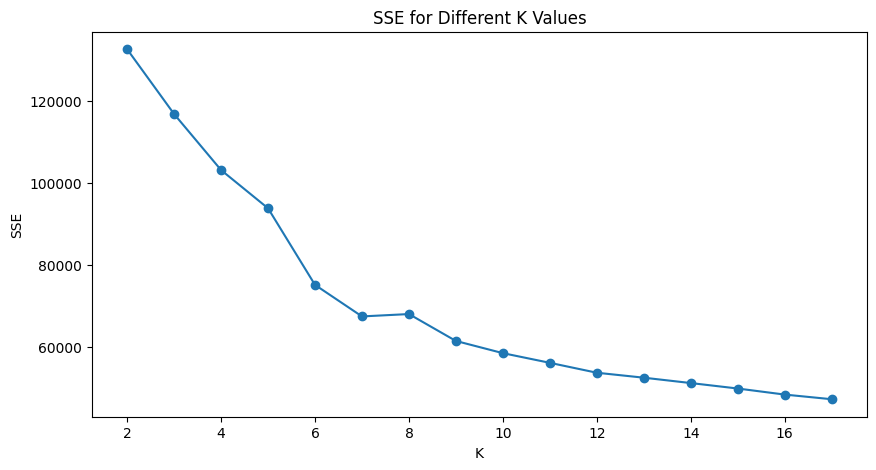

In [17]:
#plot sse for different k values
sse = []
for k in rang:
    kmeans = KMeans(n_clusters=k, random_state=best_random_state)
    kmeans.fit(df_cluster_ss)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(rang, sse, marker='o')
plt.title('SSE for Different K Values')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()


## Silhouette with different K

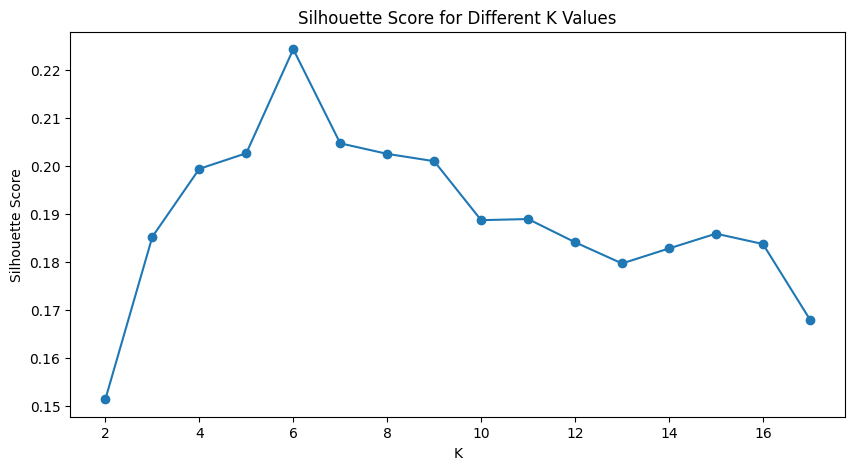

In [18]:
#silhouette score
sil = []
for k in rang:
    kmeans = KMeans(n_clusters=k, random_state=best_random_state)
    kmeans.fit(df_cluster_ss)
    sil.append(silhouette_score(df_cluster_ss, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(rang, sil, marker='o')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


In [19]:
numclusters = 6
kmeans = KMeans(n_clusters=numclusters, random_state=best_random_state)
kmeans.fit(df_cluster_ss)
df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

cluster
3    10025
0     5259
4     3818
1     2835
2     2539
5      602
Name: count, dtype: int64

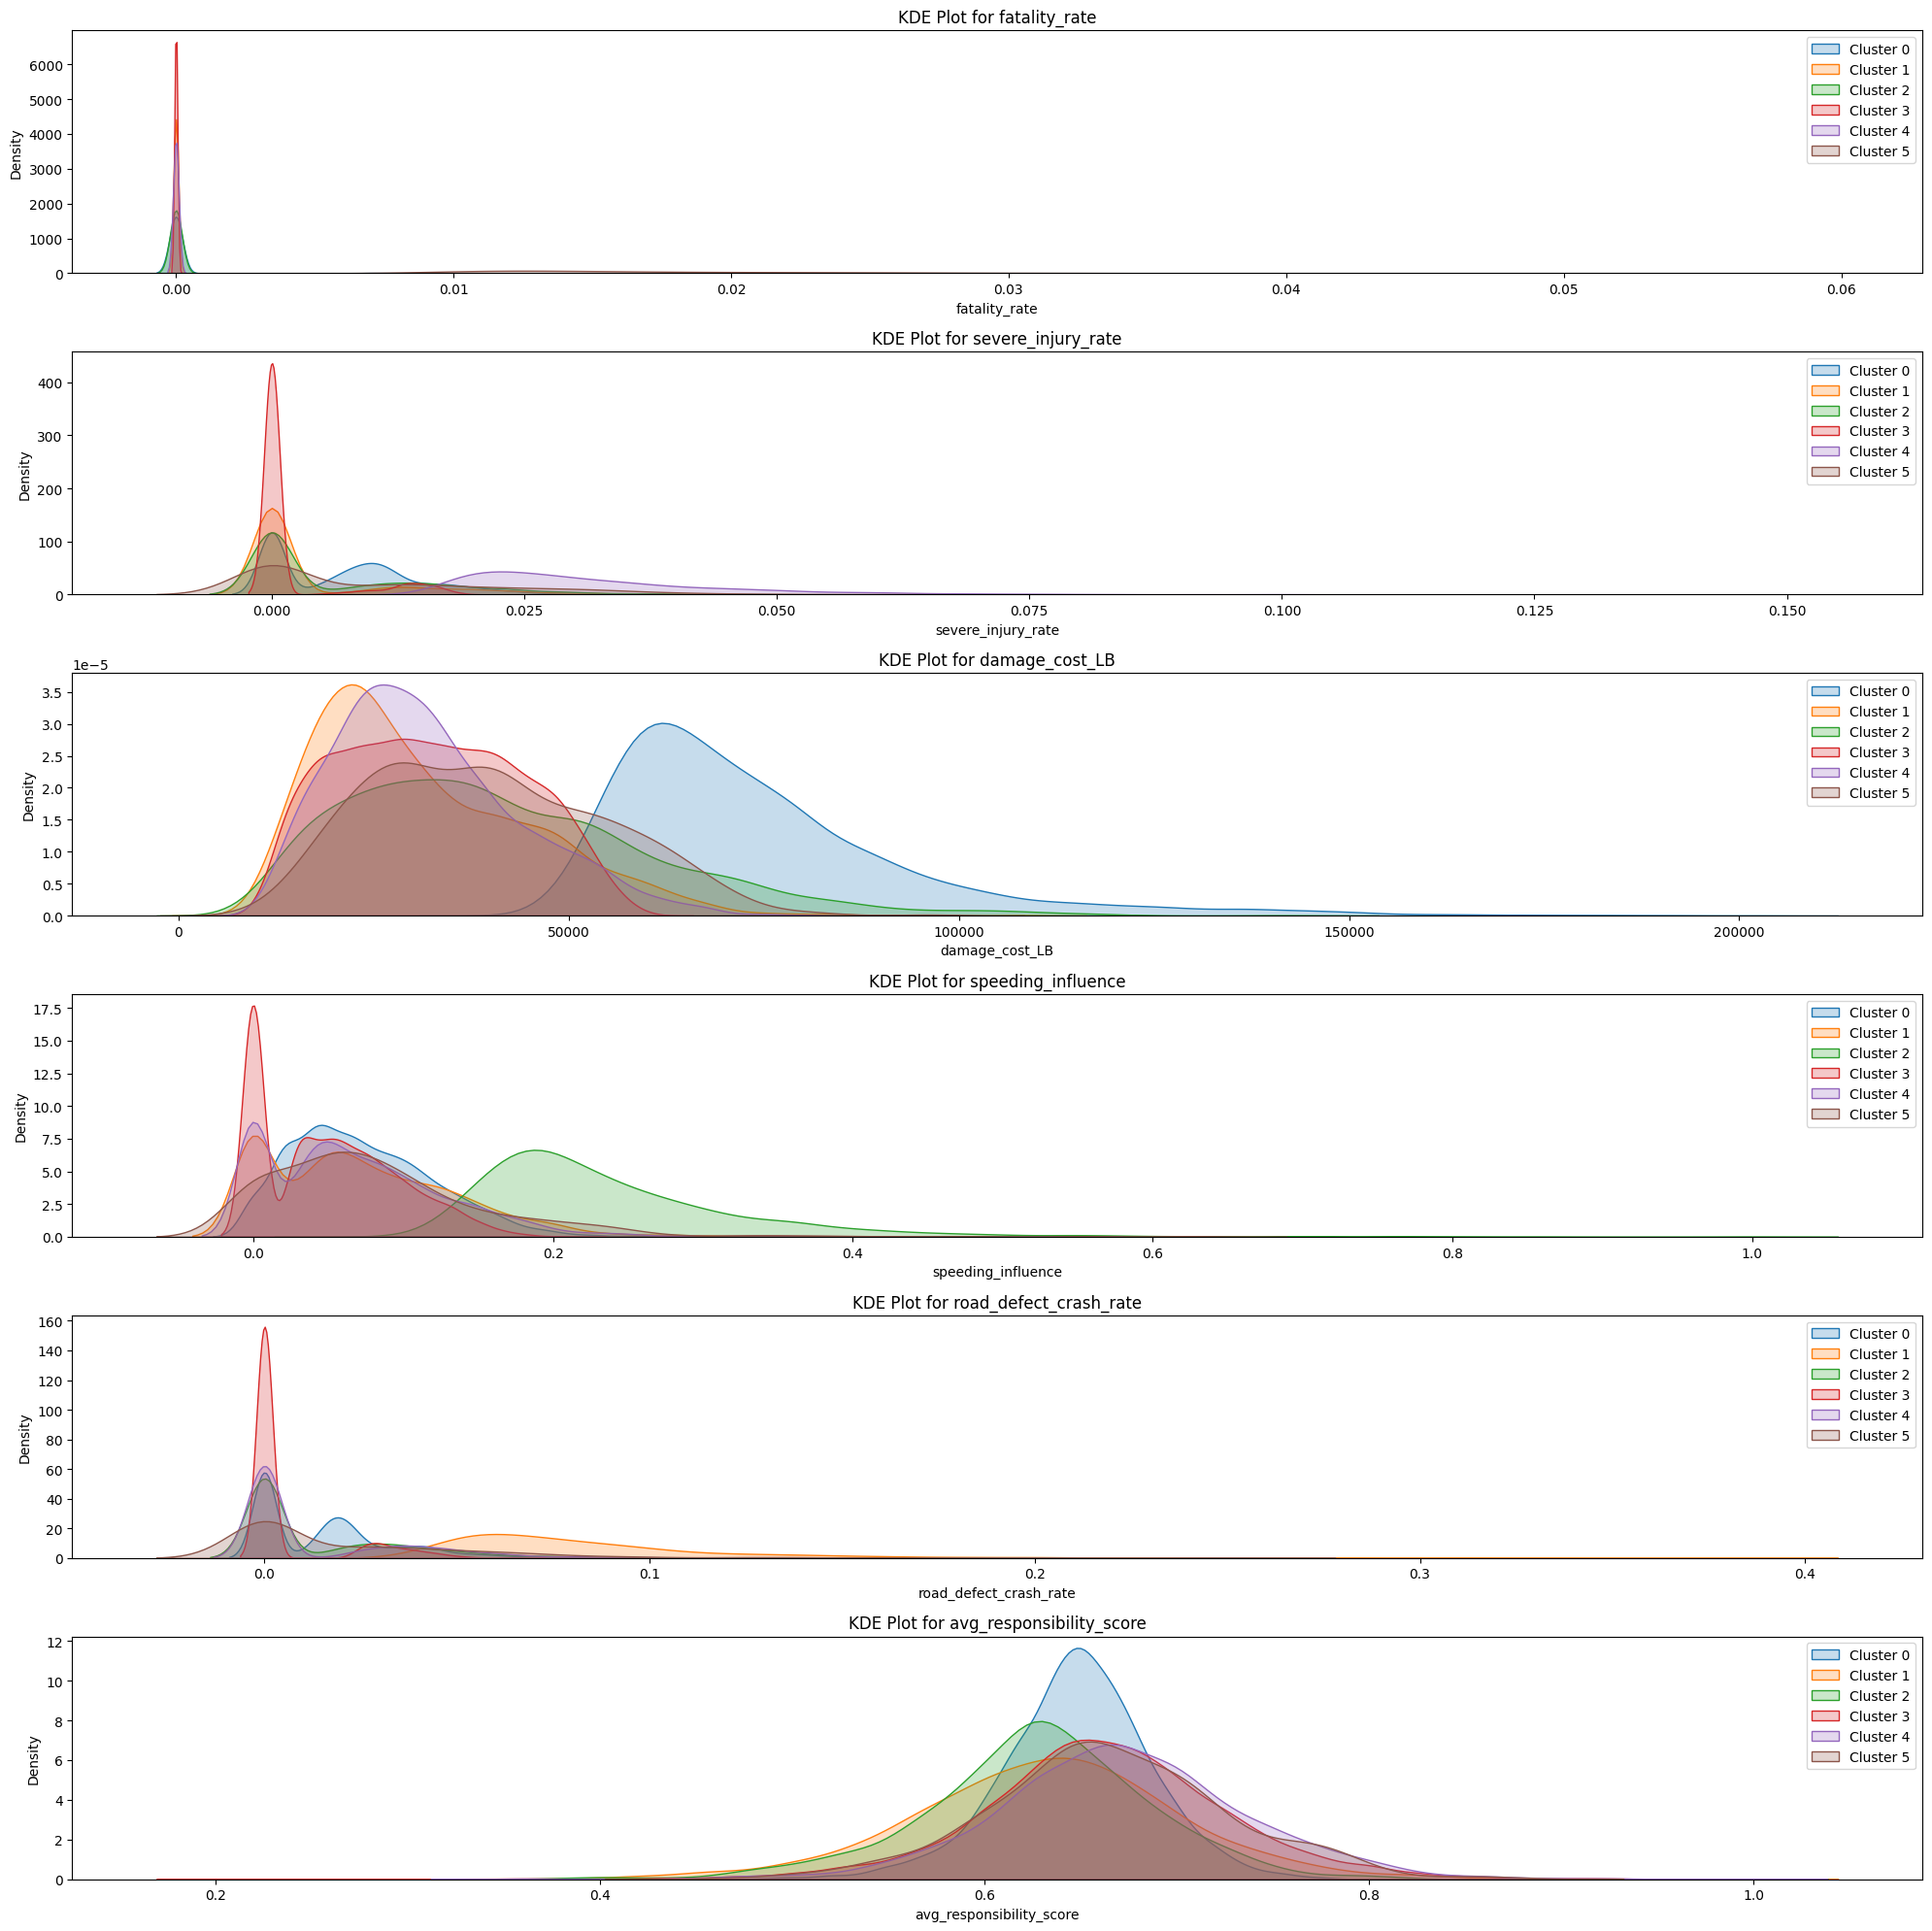

In [20]:
features = selected_features

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    for cluster in range(kmeans.n_clusters):
        sns.kdeplot(df[df['cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'KDE Plot for {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

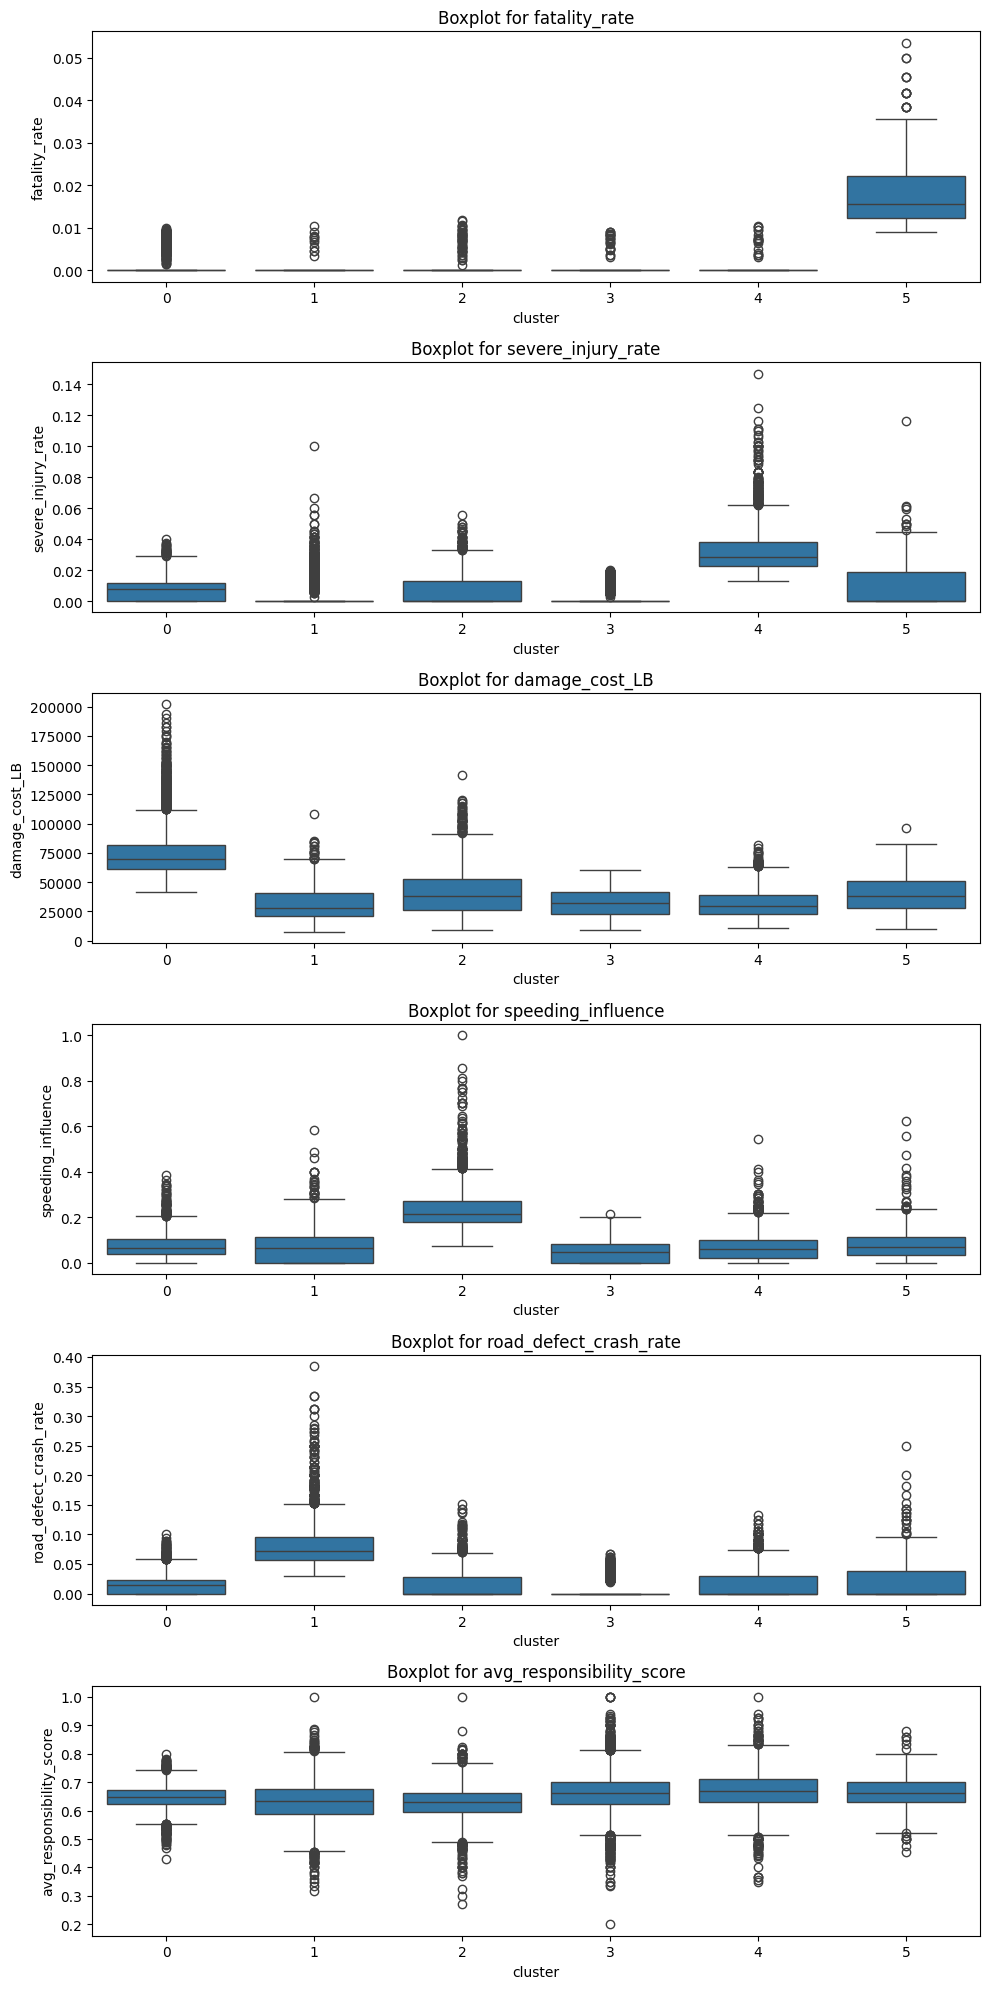

In [21]:
features = selected_features

plt.figure(figsize=(10, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()


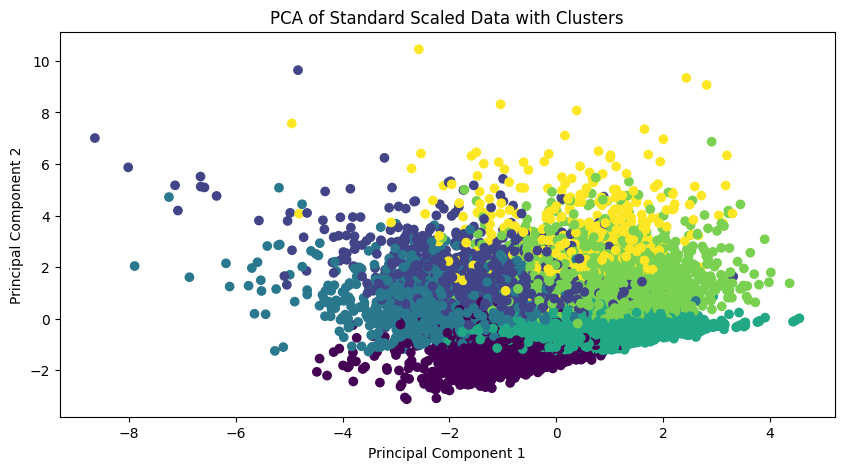

In [22]:
# show the pca plot with the cluster
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('PCA of Standard Scaled Data with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


d:\- UNI\DM\project2\DM-Project2\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


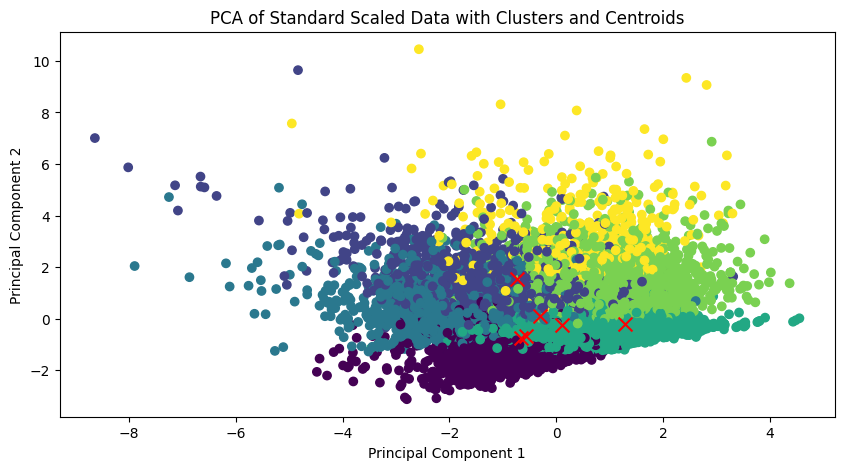

In [23]:
#show the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100)
plt.title('PCA of Standard Scaled Data with Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


In [24]:
def clusters_pairplot(df, centroids):
    pairplot = sns.pairplot(
        df,
        hue='cluster',
        palette='Set1',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.5}
    )

    for i, ax in enumerate(pairplot.axes.flat):
        # Get features for each subplot
        row_feature = pairplot.axes.flat[i].get_ylabel()
        col_feature = pairplot.axes.flat[i].get_xlabel()

        # Add centroids only to relevant scatter plots, excluding diagonal ones
        if row_feature in df.columns and col_feature in df.columns:
            ax.scatter(
                centroids[:, df.columns.get_loc(col_feature)],  
                centroids[:, df.columns.get_loc(row_feature)], 
                marker='x', s=100, c='black', label='Centroid'
            )

    plt.legend()
    plt.show()


C:\Users\giuli\AppData\Local\Temp\ipykernel_9944\1798328297.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


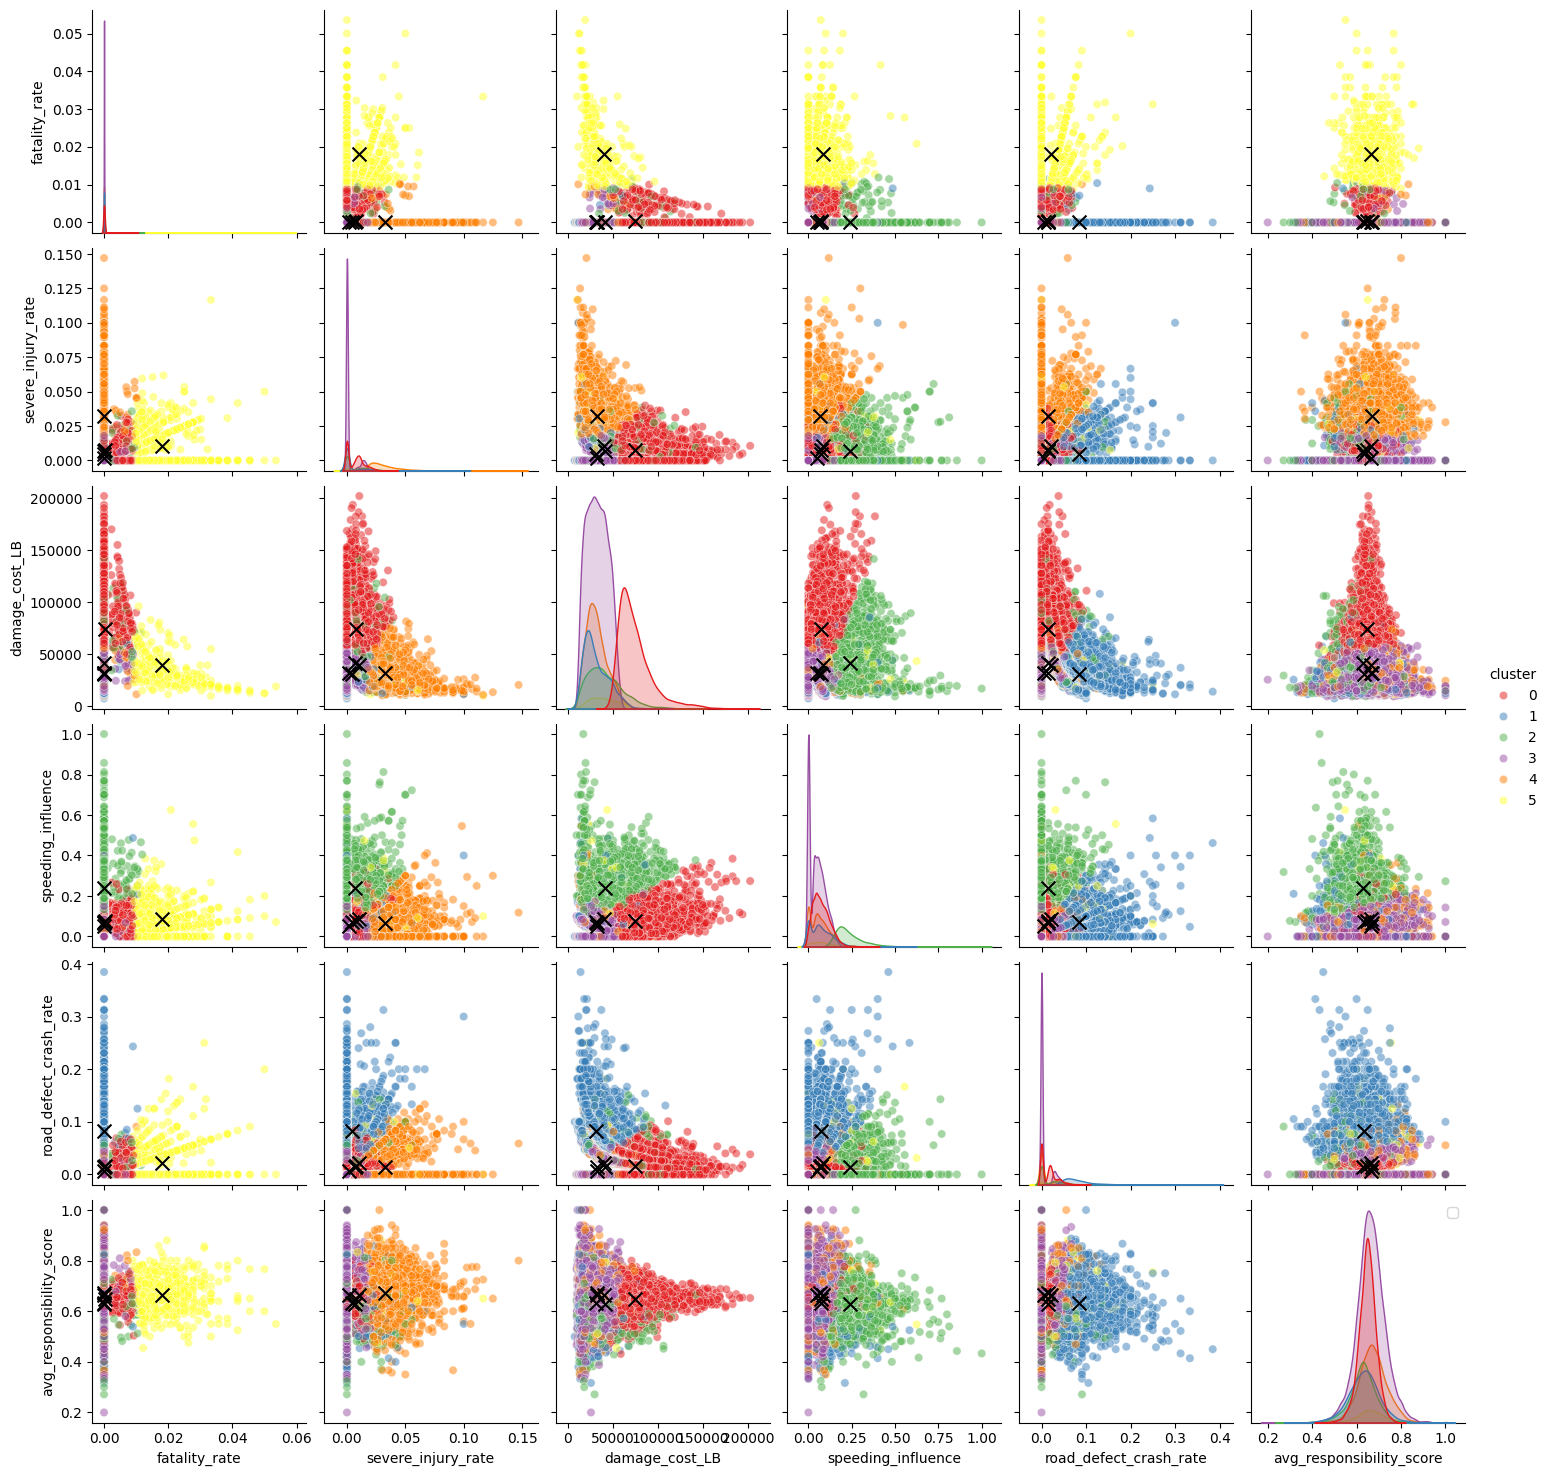

In [25]:
clusters_pairplot(df[selected_features + ['cluster']], scaler_ss.inverse_transform(centroids))

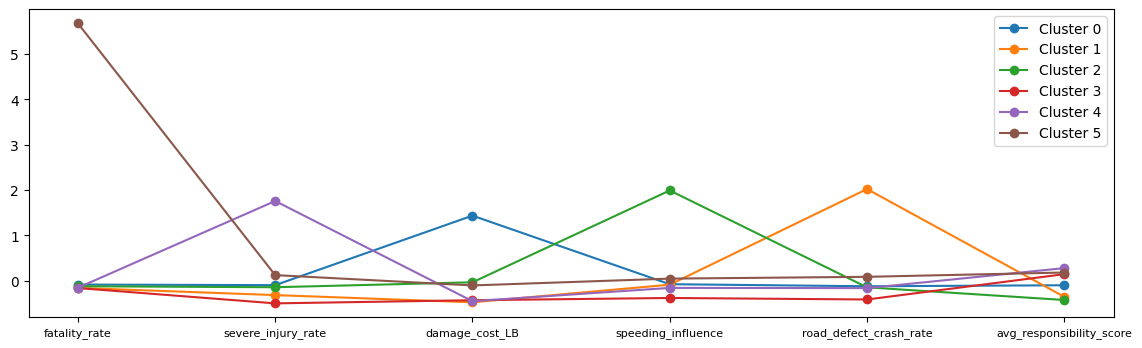

In [26]:
plt.figure(figsize=(14, 4))
for i in range(0, len(centroids)):
    plt.plot(centroids[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(selected_features)), selected_features, fontsize=8)
plt.legend(fontsize=10)
plt.show()


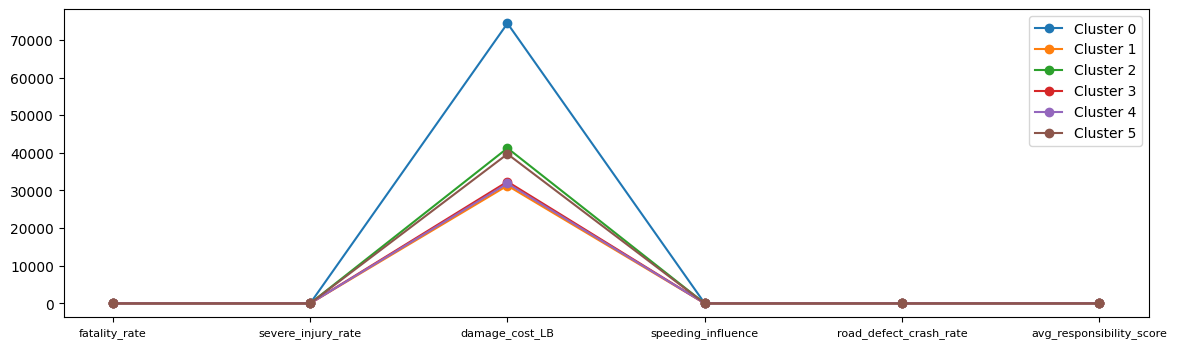

In [27]:
centroids_inverse = scaler_ss.inverse_transform(centroids)
plt.figure(figsize=(14, 4))
for i in range(0, len(centroids)):
    plt.plot(centroids_inverse[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(selected_features)), selected_features, fontsize=8)
plt.legend(fontsize=10)
plt.show()

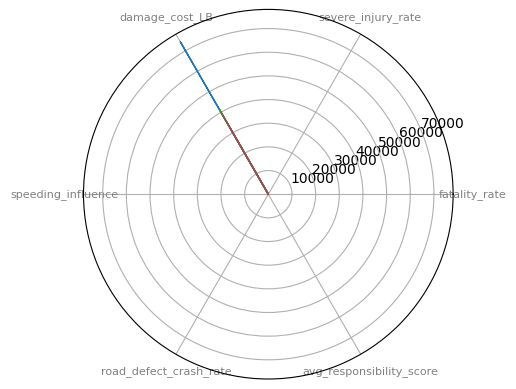

In [28]:
from math import pi
 
# number of variable
N = len(selected_features)
# compute the angle of each axis in the plot
for i in range(0, len(centroids)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroids_inverse[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], selected_features, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

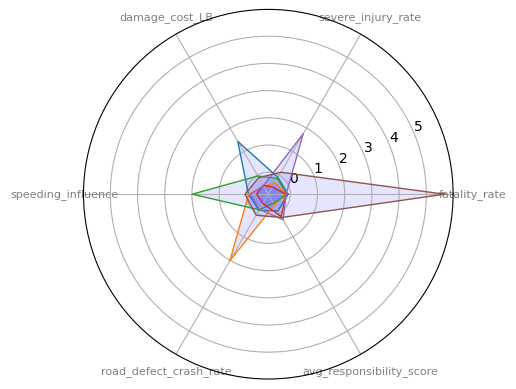

In [29]:
from math import pi
 
# number of variable
N = len(selected_features)
# compute the angle of each axis in the plot
for i in range(0, len(centroids)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centroids[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], selected_features, color='grey', size=8) 

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

In [30]:
df_cluster_ss.shape[0]

25078

In [31]:
df_cluster_with_labels = df[selected_features + ['cluster']]

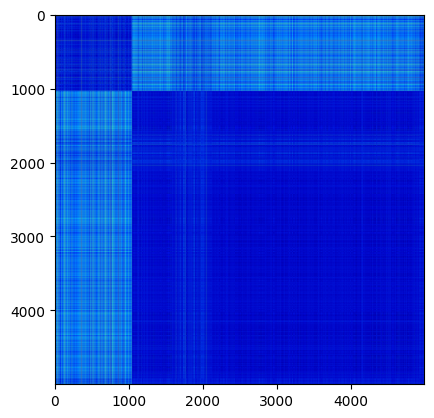

In [32]:
from sklearn.metrics import pairwise_distances
df_cluster_ss_subset = df_cluster_with_labels.sample(5000)
df_cluster_ss_subset = df_cluster_ss_subset.sort_values(by='cluster')
# compute the pairwise distances
distances = pairwise_distances(df_cluster_ss_subset)

plt.imshow(distances, cmap ='jet')
plt.grid(False)


In [38]:
df_group = df.groupby('BEAT_OF_OCCURRENCE').sum("total_crashes")
df_group.sort_values(by='total_crashes', ascending=False, inplace=True)
df_group

,CRASH_YEAR,CRASH_MONTH,avg_age,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,vehicle_involvement_rate,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,pct_neo_patented_drivers,pct_senior_drivers,total_male_drivers,total_female_drivers,total_unknow_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial,combined_weather_road_severity,male_ratio,cluster
BEAT_OF_OCCURRENCE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1834.0,195993,625,3973.779805,63.033002,30.206790,21.479732,42.818625,9834,0.015553,0.578514,5.559021,1577.0,2.215618,32.527567,11.202238,1.317164,14.029603,11.066427,182,382,1.800268,3.675545,0.0,0.0,0.0,799,1487,2927,5420,11800500,6068,3259,507,7415,1286,171,28,934,7829,53,33,41,1878,5420,1487,2927,43.0,5.0,14711.0,592.0,618.0,24.970555,0.0,17
114.0,195993,625,3890.679595,62.517219,28.474304,23.478172,43.642742,8510,0.037399,0.952561,4.742140,2024.0,2.567153,33.856478,10.709302,2.263778,30.410468,11.966574,212,299,2.450787,3.344910,0.0,0.0,0.0,990,976,2159,5375,10709500,5280,2864,366,6504,1068,128,21,789,6762,107,48,47,1546,5375,976,2159,66.0,1.0,14119.0,467.0,353.0,25.476625,0.0,106
813.0,195993,625,3887.538759,62.710297,31.097485,22.857756,42.887223,8445,0.037966,0.557921,4.596201,1546.0,2.439714,32.045581,12.203610,1.313675,8.589001,12.710461,343,334,3.953360,3.685885,0.0,0.0,0.0,976,712,2429,5304,10741000,5312,2797,336,6538,1117,219,44,527,7201,36,35,45,1128,5304,712,2429,43.0,0.0,13290.0,180.0,378.0,26.153648,0.0,6
815.0,195993,625,3801.178168,63.024035,31.097272,25.050737,37.911084,8063,0.070785,0.595133,4.669375,1497.0,2.549632,28.416506,12.048120,1.648243,11.002872,11.758419,335,219,3.998515,2.570409,0.0,0.0,0.0,1078,651,2155,5257,10366000,5409,2371,283,6159,1089,245,50,520,6779,54,43,44,1143,5257,651,2155,50.0,4.0,12293.0,119.0,868.0,27.469351,0.0,16
1831.0,195993,625,3888.524965,64.875396,30.745098,21.357300,54.291774,7470,0.009953,0.609596,5.621189,1327.0,3.111467,42.757255,11.616998,0.982438,7.017684,14.747908,103,202,1.404521,2.658288,0.0,0.0,0.0,490,1094,2179,4197,9021500,3826,3314,330,5646,989,173,11,651,6032,30,21,19,1368,4197,1094,2179,44.0,0.0,11450.0,144.0,453.0,25.112419,0.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314.0,137401,455,2775.506432,44.548968,22.835954,18.295605,25.519703,915,0.000000,0.527882,3.837306,197.0,10.599655,16.891380,8.102385,1.666082,4.756886,9.873850,34,27,2.328605,1.871832,0.0,0.0,0.0,98,103,218,594,1160500,610,229,76,671,99,35,6,104,710,5,1,16,183,594,103,218,2.0,1.0,1094.0,39.0,30.0,20.111745,0.0,183
2431.0,113156,399,2242.263716,35.991815,21.130717,13.717602,25.861266,756,0.000000,0.440599,3.537240,154.0,9.074552,17.398004,6.924238,0.731908,2.292991,8.491268,16,26,1.078668,1.767699,0.0,0.0,0.0,85,116,239,401,898500,439,237,80,500,97,23,4,132,561,4,5,1,185,401,116,239,4.0,0.0,957.0,16.0,31.0,16.682848,0.0,164
1654.0,105131,345,2150.225867,31.149454,24.910481,17.993282,24.866502,705,0.027778,0.887021,